In [1]:
%matplotlib inline

import io, os, sys, types, datetime, pickle, warnings

import pandas as pd
import numpy as np
import scipy.optimize as opt

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
master_path = os.getcwd()
if master_path not in sys.path:
    sys.path.append(master_path)

In [3]:
def parse_folder_info(path):
    folders = [f for f in os.listdir(path) if not os.path.isfile(os.path.join(path, f))]
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    if('.DS_Store' in files):
        files.remove('.DS_Store')
    if('._.DS_Store' in files):
        files.remove('._.DS_Store')
    return folders, files

In [4]:
def get_time_columns(columns):
    time_str = []
    time_datetime = []
    for col in columns:
        if col[0].isnumeric():
            time_str.append(col)
            time_datetime.append(datetime.datetime.strptime(col, '%m/%d/%y'))
    return time_str, time_datetime

In [192]:
def format_fn(tick_val, tick_pos):
    if(tick_val >= 0 and tick_val < len(ytick_list)):
        return ytick_list[int(tick_val)]
    else:
        return int(tick_val)

In [6]:
def autolabel(rects, ax, str_format):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(str_format.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [299]:
def exp_growth(t, r, x0):
#     return np.log10(x0) + t * np.log10(1+r)
    return x0 * (1 + r) ** t

In [385]:
def logistic_growth(t, r, K, P0):
    return K / (1 + (K - P0)/P0 * np.exp(-r*t))

In [7]:
cat_color = {'Confirmed':'tab:blue', 'Deaths':'tab:orange', 'Recovered':'tab:green', 'Active':'tab:red'}

In [8]:
path_time_series = os.path.join(master_path, 'csse_covid_19_data', 'csse_covid_19_time_series')

In [9]:
folders, files = parse_folder_info(path_time_series)
df_time_series = pd.DataFrame()
# df_time_series_reorged = pd.DataFrame(columns = ['Country/Region', 'Province/State', 'Date', 'Category', 'Number'])
for file_name in files:
    if('.csv' in file_name):
        df_current = pd.read_csv(os.path.join(path_time_series, file_name))        
        category = file_name[21:file_name.index('.csv')]
        print(category)
        df_current.loc[:,'Category'] = category
        if df_time_series.empty:
            df_time_series = df_current
        else:
            df_time_series = df_time_series.append(df_current, ignore_index = True)

time_str, time_datetime = get_time_columns(df_time_series.columns)
# pd.to_datetime()

Recovered
Deaths
Confirmed


In [10]:
df_time_series.loc[:,'New Today'] = df_time_series.loc[:,time_str[-1]] - df_time_series.loc[:,time_str[-2]]

In [11]:
""" Total Recovered, death, and confirmed """

' Total Recovered, death, and confirmed '

In [12]:
total = df_time_series.groupby('Category').sum().loc[:,time_str]
mainland_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
row = total - mainland_china
hubei = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Province/State').get_group('Hubei').groupby('Category').sum().loc[:,time_str]
china_others = mainland_china - hubei

total.loc['Active',:] = total.loc['Confirmed',:] - (total.loc['Recovered',:] + total.loc['Deaths',:])
mainland_china.loc['Active',:] = mainland_china.loc['Confirmed',:] - (mainland_china.loc['Recovered',:] + mainland_china.loc['Deaths',:])
row.loc['Active',:] = row.loc['Confirmed',:] - (row.loc['Recovered',:] + row.loc['Deaths',:])
hubei.loc['Active',:] = hubei.loc['Confirmed',:] - (hubei.loc['Recovered',:] + hubei.loc['Deaths',:])
china_others.loc['Active',:] = china_others.loc['Confirmed',:] - (china_others.loc['Recovered',:] + china_others.loc['Deaths',:])

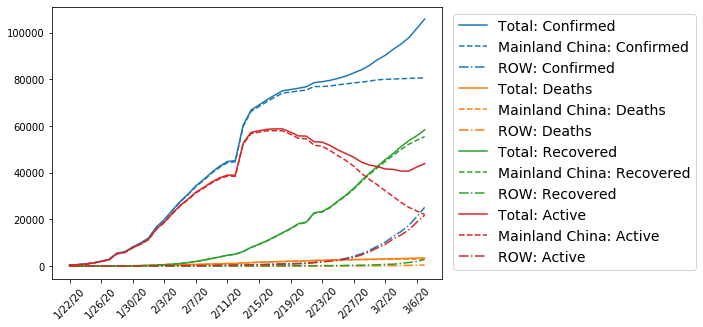

In [13]:
fig, ax1 = plt.subplots(1,1,figsize = (7,5))
for cat in cat_color:
    ax1.plot(total.groupby('Category').get_group(cat).sum()[time_str], color = cat_color[cat])
    ax1.plot(mainland_china.groupby('Category').get_group(cat).sum()[time_str], '--', color = cat_color[cat])
    ax1.plot(row.groupby('Category').get_group(cat).sum()[time_str], '-.', color = cat_color[cat])
legend = ['Total: Confirmed',
         'Mainland China: Confirmed',
          'ROW: Confirmed',
         'Total: Deaths',
         'Mainland China: Deaths',
          'ROW: Deaths',
         'Total: Recovered',
         'Mainland China: Recovered',
          'ROW: Recovered',
         'Total: Active',
         'Mainland China: Active',
         'ROW: Active']
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
# ax1.set_title('Total', size = 18)
plt.legend(legend, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize = 14)

Text(0.5, 1.0, 'ROW: 25184')

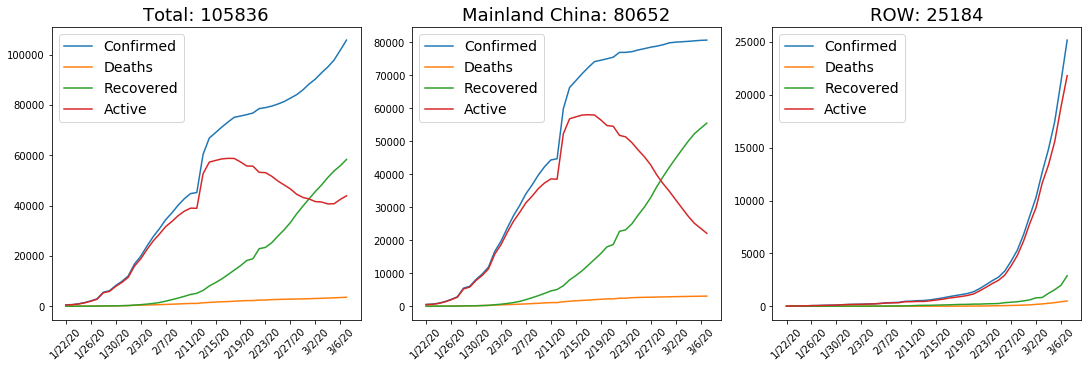

In [14]:
fig = plt.figure(figsize = (15, 5), constrained_layout=True)
gs = fig.add_gridspec(1,3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(total.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(total.index, fontsize = 14)
ax1.set_title(f'Total: {int(total.loc["Confirmed",time_str[-1]])}', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(mainland_china.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title(f'Mainland China: {int(mainland_china.loc["Confirmed",time_str[-1]])}', size = 18)

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(row.transpose())
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(row.index, fontsize = 14)
ax3.set_title(f'ROW: {int(row.loc["Confirmed",time_str[-1]])}', size = 18)

Text(0.5, 1.0, 'ROW Growth Factor, 1.05 today')

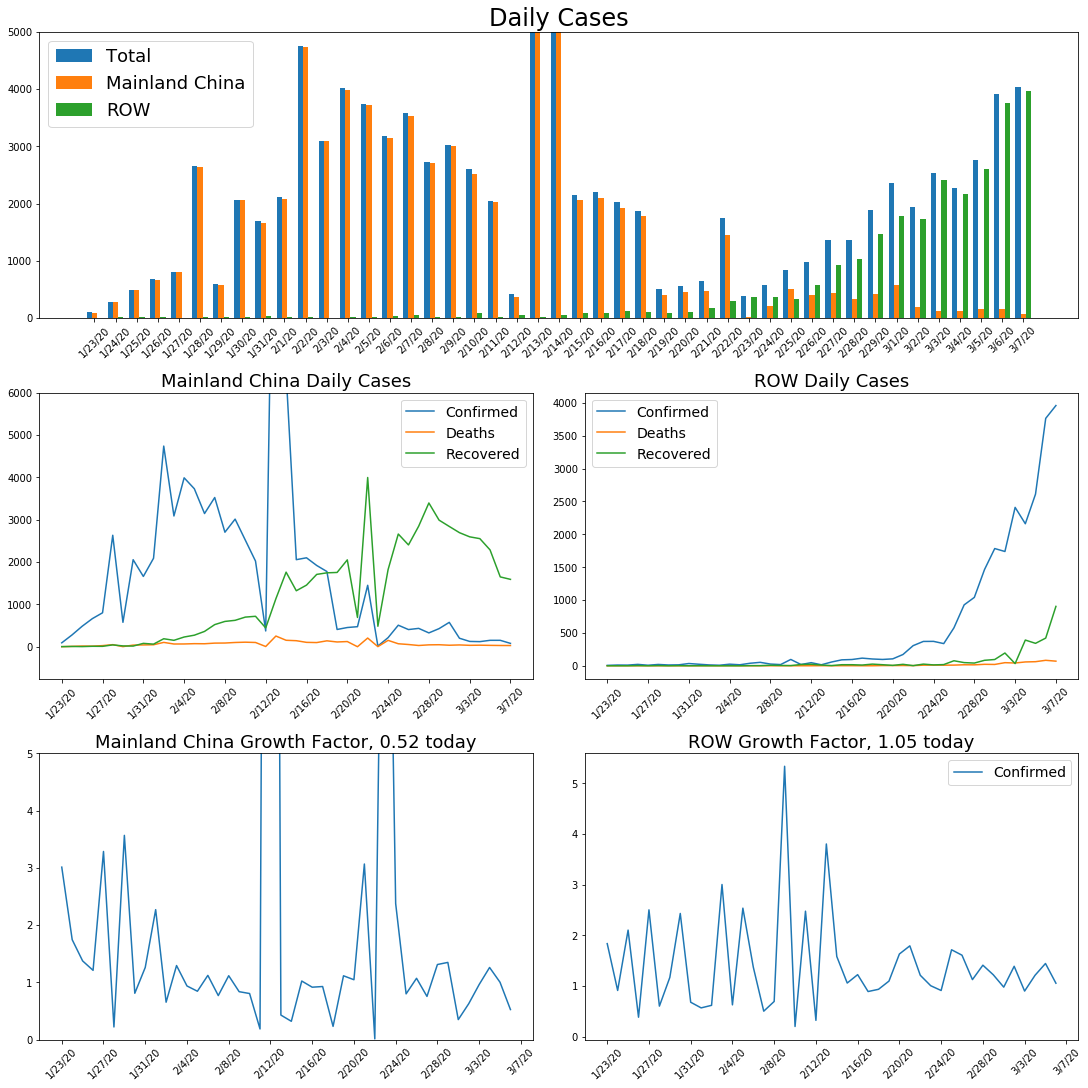

In [354]:
fig = plt.figure(figsize = (15, 15), constrained_layout=True)
gs = fig.add_gridspec(3,2)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(np.transpose(mainland_china.to_numpy())[1:,:-1] - np.transpose(mainland_china.to_numpy())[:-1,:-1])
a = ax2.set_xticklabels(time_str[1:])
ytick_list = time_str[1:]
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.set_ylim(top = 6000)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title('Mainland China Daily Cases', size = 18)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(np.transpose(row.to_numpy())[1:,:-1] - np.transpose(row.to_numpy())[:-1,:-1])
# ytick_list = time_str[1:]
ax3.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
# a = ax3.set_xticklabels(time_str[1:])
ax3.legend(row.index, fontsize = 14)
ax3.set_title('ROW Daily Cases', size = 18)

ax4 = fig.add_subplot(gs[0, :])

data1 = total.loc['Confirmed',:].to_numpy()[1:] - total.loc['Confirmed',:].to_numpy()[:-1]
data2 = mainland_china.loc['Confirmed',:].to_numpy()[1:] - mainland_china.loc['Confirmed',:].to_numpy()[0:-1]
data3 = row.loc['Confirmed',:].to_numpy()[1:] - row.loc['Confirmed',:].to_numpy()[0:-1]

x = np.arange(len(data1))
width = 0.25
ax4.bar(x + 0, data1, width = width)
ax4.bar(x + width*1, data2, width = width)
ax4.bar(x + width*2, data3, width = width)
ax4.set_yscale('linear')
ax4.set_ylim([0, 5000])
a = ax4.set_xticks(x + width)
a = ax4.set_xticklabels(time_str[1:])
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(['Total', 'Mainland China', 'ROW'], fontsize = 18, loc='upper left')
ax4.set_title('Daily Cases', size = 24)

ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(data2[1:] / data2[:-1])
# ytick_list = time_str[2:]
ax5.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax5.xaxis.set_major_locator(myLocator)
ax5.set_ylim(top = 5, bottom = 0)
ax5.tick_params(axis = 'x', labelrotation = 45)
# ax5.legend(mainland_china.index, fontsize = 14)
ax5.set_title(f'Mainland China Growth Factor, {(data2[1:] / data2[:-1])[-1]:.2f} today', size = 18)

ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(np.transpose(data3[1:] / data3[:-1]))
ax6.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax6.xaxis.set_major_locator(myLocator)
ax6.tick_params(axis = 'x', labelrotation = 45)
# a = ax6.set_xticklabels(time_str[1:])
ax6.legend(row.index, fontsize = 14)
ax6.set_title(f'ROW Growth Factor, {(data3[1:] / data3[:-1])[-1]:.2f} today', size = 18)

Fatality rate in Mainland China (outside Hubei): 0.85%
Fatality rate in rest of the world: 1.94%


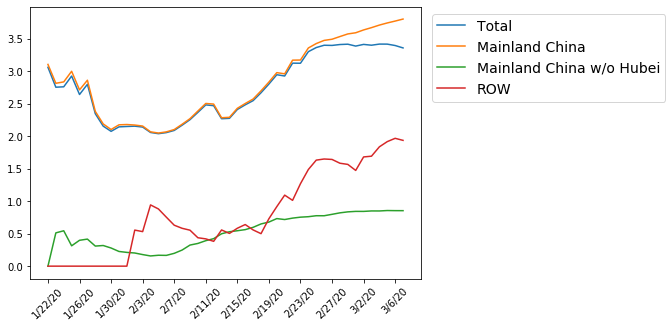

In [196]:
data1 = total.loc['Deaths',time_str] / total.loc['Confirmed',time_str]
# data2 = 
# data3 = 
# data4 = 

fig, ax1 = plt.subplots(1,1,figsize = (7,5))

ax1.plot(total.loc['Deaths',time_str] / total.loc['Confirmed',time_str] * 100)
ax1.plot(mainland_china.loc['Deaths',time_str] / mainland_china.loc['Confirmed',time_str] * 100)
ax1.plot(china_others.loc['Deaths',time_str] / china_others.loc['Confirmed',time_str] * 100)
ax1.plot(row.loc['Deaths',time_str] / row.loc['Confirmed',time_str] * 100)
plt.legend(['Total',
            'Mainland China',
            'Mainland China w/o Hubei',
            'ROW'
           ], bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize = 14)
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)

dr1 = china_others.loc['Deaths', time_str[-1]]/china_others.loc['Confirmed', time_str[-1]] * 100
dr2 = row.loc['Deaths', time_str[-1]]/row.loc['Confirmed', time_str[-1]] * 100
print(f'Fatality rate in Mainland China (outside Hubei): {dr1:.2f}%')
print(f'Fatality rate in rest of the world: {dr2:.2f}%')

In [343]:
"""US"""

'US'

In [344]:
df_US = df_time_series.groupby(['Country/Region']).get_group(('US'))
df_Ca = pd.DataFrame()
df_DP = pd.DataFrame()
df_USmain = pd.DataFrame()
df_GP = pd.DataFrame()

for i in df_US.index:
    if ('CA' in df_US.loc[i, 'Province/State']):
        if('(From Diamond Princess)' not in df_US.loc[i, 'Province/State']) :
            df_Ca = df_Ca.append(df_US.loc[i,:])
    if('(From Diamond Princess)'in df_US.loc[i, 'Province/State']) :
        df_DP = df_DP.append(df_US.loc[i,:])
    if('Grand Princess' in df_US.loc[i, 'Province/State']):
        df_GP = df_GP.append(df_US.loc[i,:])
    else:
        df_USmain = df_USmain.append(df_US.loc[i,:])

df_US_sum = df_US.groupby('Category').sum().loc[:,time_str]
df_Ca_sum = df_Ca.groupby('Category').sum().loc[:,time_str]
df_DP_sum = df_DP.groupby('Category').sum().loc[:,time_str]
df_USmain_sum = df_USmain.groupby('Category').sum().loc[:,time_str]
df_GP_sum = df_GP.groupby('Category').sum().loc[:,time_str]

df_US_sum.loc['Active',:] = df_US_sum.loc['Confirmed',:] - (df_US_sum.loc['Recovered',:] + df_US_sum.loc['Deaths',:])
df_Ca_sum.loc['Active',:] = df_Ca_sum.loc['Confirmed',:] - (df_Ca_sum.loc['Recovered',:] + df_Ca_sum.loc['Deaths',:])
df_DP_sum.loc['Active',:] = df_DP_sum.loc['Confirmed',:] - (df_DP_sum.loc['Recovered',:] + df_DP_sum.loc['Deaths',:])
df_USmain_sum.loc['Active',:] = df_USmain_sum.loc['Confirmed',:] - (df_USmain_sum.loc['Recovered',:] + df_USmain_sum.loc['Deaths',:])
df_GP_sum.loc['Active',:] = df_GP_sum.loc['Confirmed',:] - (df_GP_sum.loc['Recovered',:] + df_GP_sum.loc['Deaths',:])

Text(0.5, 1.0, 'CA Growth Factor: 2.88 today')

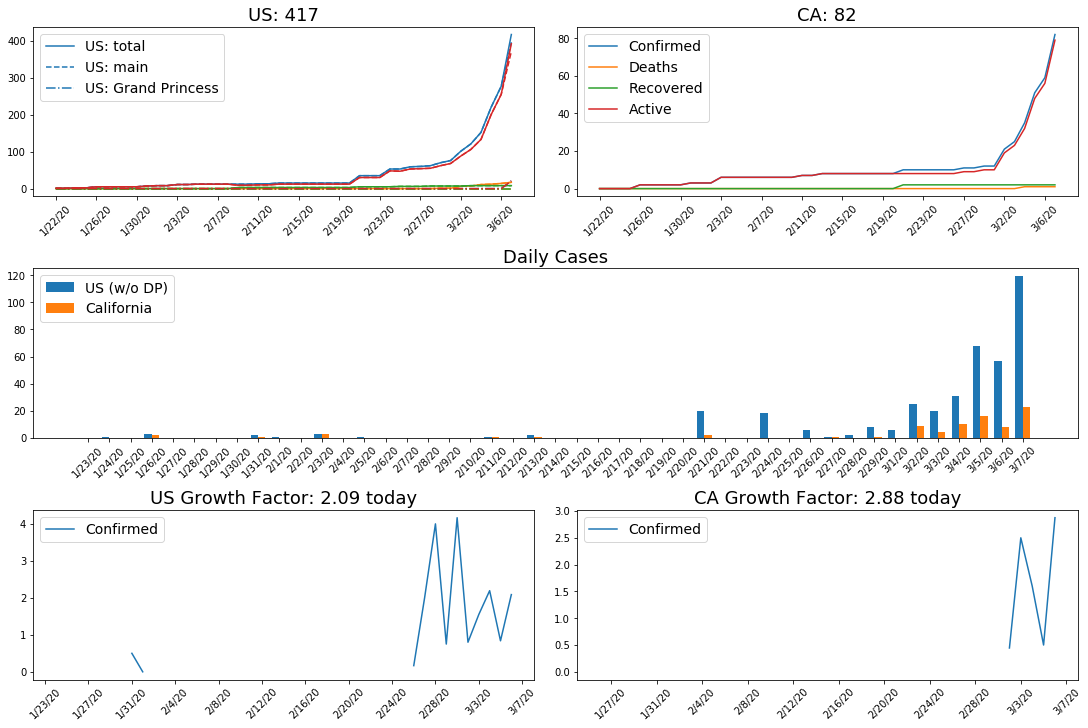

In [346]:
fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0, 0])
for cat in cat_color:
    ax1.plot(df_US_sum.loc[cat,:].transpose(), color = cat_color[cat])
    ax1.plot(df_USmain_sum.loc[cat,:].transpose(), '--', color = cat_color[cat])
    ax1.plot(df_GP_sum.loc[cat,:].transpose(), '-.', color = cat_color[cat])
legend = ['US: total', 'US: main', 'US: Grand Princess']
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(legend, fontsize = 14)
ax1.set_title(f'US: {int(df_US_sum.loc["Confirmed",time_str[-1]])}', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(df_Ca_sum.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(df_Ca_sum.index, fontsize = 14)
ax2.set_title(f'CA: {int(df_Ca_sum.loc["Confirmed",time_str[-1]])}', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = df_USmain_sum.loc['Confirmed',:].to_numpy()[1:] - df_USmain_sum.loc['Confirmed',:].to_numpy()[0:-1] 
data2 = df_Ca_sum.loc['Confirmed',:].to_numpy()[1:] - df_Ca_sum.loc['Confirmed',:].to_numpy()[0:-1] 
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('linear')
# ax3.set_yscale('linear')
# ax3.set_ylim([0, 1000])
a = ax3.set_xticks(x)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['US (w/o DP)', 'California'], fontsize = 14)
ax3.set_title('Daily Cases', size = 18)

ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(data1[1:] / data1[:-1])
ax4.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax4.xaxis.set_major_locator(myLocator)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(df_Ca_sum.index, fontsize = 14)
ax4.set_title(f'US Growth Factor: {(data1[1:] / data1[:-1])[-1]:.2f} today', size = 18)

ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(data2[1:] / data2[:-1])
ax4.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax4.xaxis.set_major_locator(myLocator)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(df_Ca_sum.index, fontsize = 14)
ax4.set_title(f'CA Growth Factor: {(data2[1:] / data2[:-1])[-1]:.2f} today', size = 18)

In [357]:
x = np.arange(len(time_str))
y = df_confirmed.loc[ctry,time_str].to_list()

ind_t0 = y.index(next(filter(lambda x: x!=0, y)))
t = np.arange(len(time_str))[ind_t0:] - ind_t0
p_t = df_confirmed.loc[ctry,time_str].to_numpy()[ind_t0:]
# popt_exp, pcov_exp = opt.curve_fit(exp_growth,  t,  p_t)
popt_log, pcov_log = opt.curve_fit(logistic_growth,  t,  p_t, maxfev=10000)

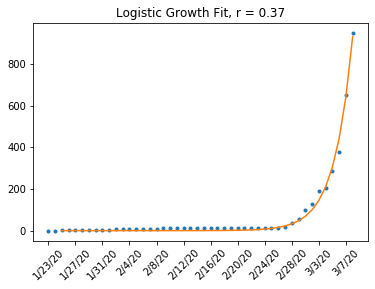

In [365]:
fig, ax = plt.subplots(1, 1)
plt.plot(x, y, '.')
x1 = np.arange(len(time_str) + 10)
plt.plot(t + ind_t0, logistic_growth(t, popt_log[0], popt_log[1], popt_log[2]))
plt.title(f'Logistic Growth Fit, r = {popt_log[0]:.2f}')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax.xaxis.set_major_locator(myLocator)
ax.tick_params(axis = 'x', labelrotation = 45)

https://lmfit.github.io/lmfit-py/model.html

In [366]:
df_Ca_details = df_Ca.groupby('Category').get_group('Confirmed').groupby('Province/State').sum()

In [367]:
df_Ca_details.sort_values(by = ['New Today', time_str[-1]], inplace = True, ascending = [False, False])

In [368]:
df_Ca_details.loc[:,[time_str[-1], 'New Today']]

,3/7/20,New Today
Province/State,,
"Santa Clara County, CA",32.0,12.0
"San Francisco County, CA",9.0,7.0
"Los Angeles, CA",14.0,1.0
"Alameda County, CA",2.0,1.0
"Madera County, CA",1.0,1.0
"Santa Cruz County, CA",1.0,1.0
"Placer County, CA",5.0,0.0
"Contra Costa County, CA",3.0,0.0
"Orange County, CA",3.0,0.0


In [369]:
""" Mainland China """

' Mainland China '

Text(0.5, 1.0, 'Other Provinces Daily')

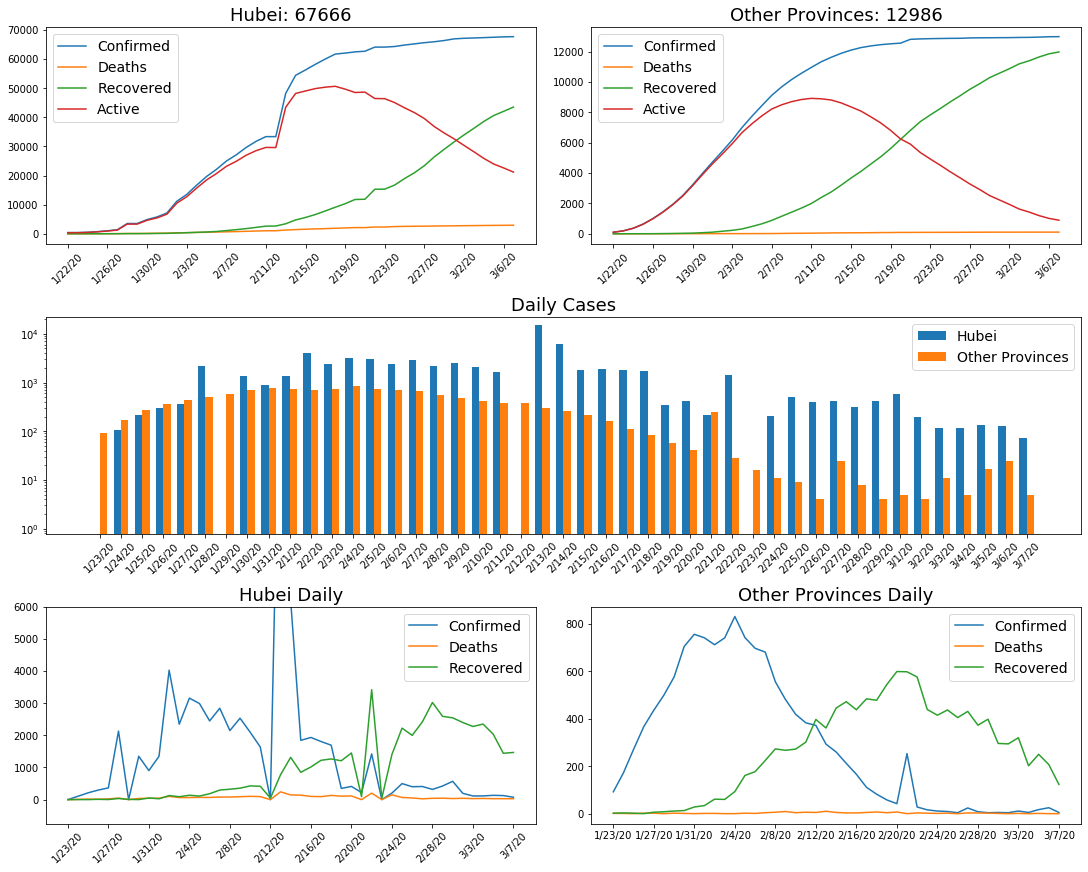

In [370]:
fig = plt.figure(figsize = (15, 12), constrained_layout=True)
gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(hubei.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(hubei.index, fontsize = 14)
ax1.set_title(f'Hubei: {int(hubei.loc["Confirmed",time_str[-1]])}', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(china_others.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(china_others.index, fontsize = 14)
ax2.set_title(f'Other Provinces: {int(china_others.loc["Confirmed",time_str[-1]])}', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = hubei.loc['Confirmed',:].to_numpy()[1:] - hubei.loc['Confirmed',:].to_numpy()[:-1]
data2 = china_others.loc['Confirmed',:].to_numpy()[1:] - china_others.loc['Confirmed',:].to_numpy()[0:-1]
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('log')
# ax3.set_yscale('linear')
# ax3.set_ylim([0, 100])
a = ax3.set_xticks(x)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['Hubei', 'Other Provinces'], fontsize = 14)
ax3.set_ylim(bottom = 10**-0.1)
ax3.set_title('Daily Cases', size = 18)

ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(np.transpose(hubei.to_numpy())[1:,:-1] - np.transpose(hubei.to_numpy())[:-1,:-1])
ax4.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax4.xaxis.set_major_locator(myLocator)
ax4.set_ylim(top = 6000)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(mainland_china.index, fontsize = 14)
ax4.set_title('Hubei Daily', size = 18)

ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(np.transpose(china_others.to_numpy())[1:,:-1] - np.transpose(china_others.to_numpy())[:-1,:-1])
ax5.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax5.xaxis.set_major_locator(myLocator)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax5.legend(china_others.index, fontsize = 14)
ax5.set_title('Other Provinces Daily', size = 18)

In [27]:
""" Outside Mainland China"""

' Outside Mainland China'

In [435]:
def get_growth_rate(ctry, df_confirmed, time_str):
    x = np.arange(len(time_str))
    y = df_confirmed.loc[ctry,time_str].to_list()

    ind_t0 = y.index(next(filter(lambda x: x!=0, y)))
    t = np.arange(len(time_str))[ind_t0:] - ind_t0
    p_t = df_confirmed.loc[ctry,time_str].to_numpy()[ind_t0:]
    popt_log, pcov_log = opt.curve_fit(logistic_growth,  t,  p_t, p0 = (0.1, 1000, 1), maxfev=100000)    
    return popt_log[0]

In [436]:
df_confirmed = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()
df_recovered = df_time_series.groupby('Category').get_group('Recovered').groupby('Country/Region').sum()
df_deaths = df_time_series.groupby('Category').get_group('Deaths').groupby('Country/Region').sum()
df_active = df_confirmed - (df_recovered + df_deaths)

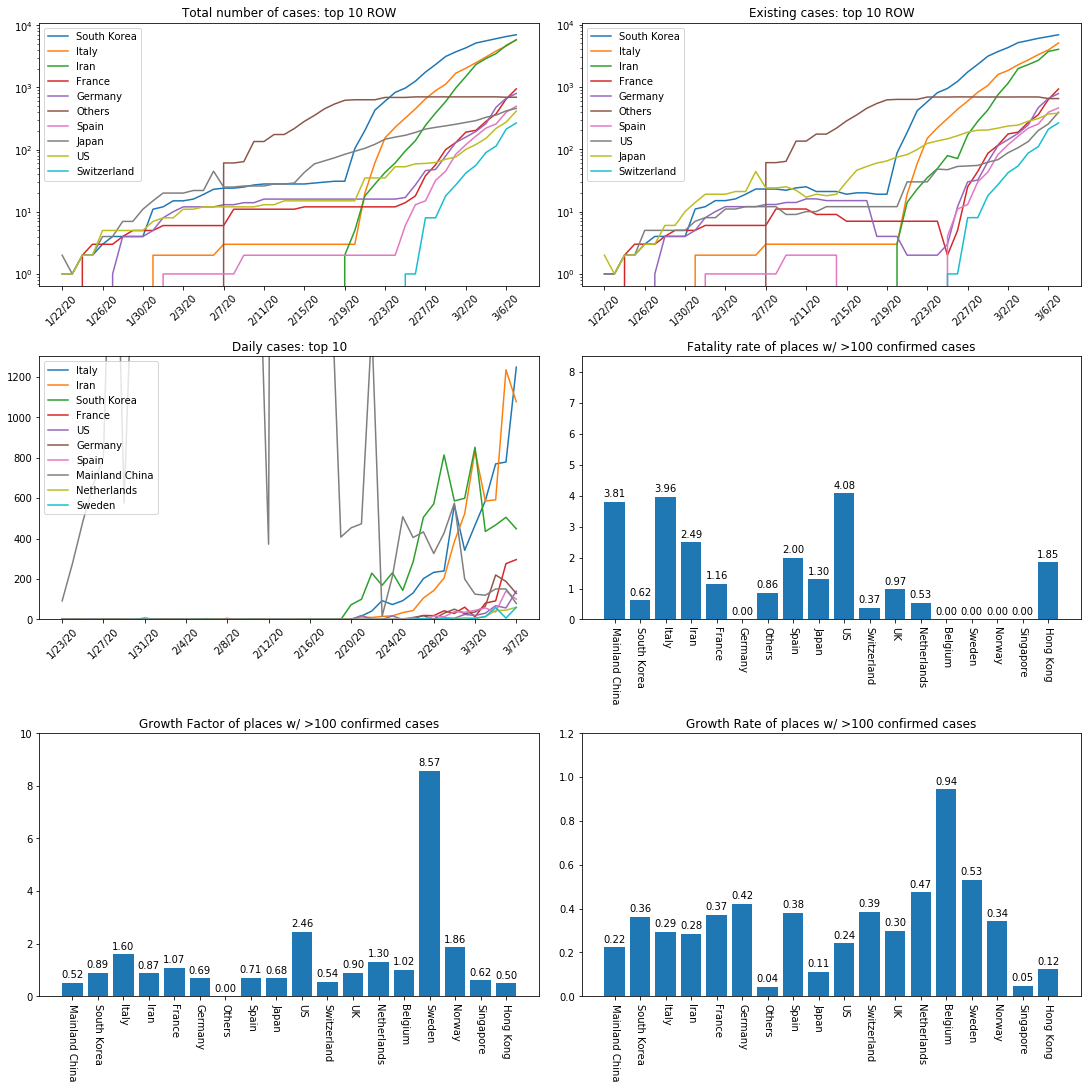

In [531]:
fig = plt.figure(figsize = (15, 15), constrained_layout=True)
gs = fig.add_gridspec(3, 2)

ax1 = fig.add_subplot(gs[0, 0])

df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_confirmed.index[1:11])
df_plot = df_confirmed.loc[countries,time_str]

ax1.plot(df_plot.transpose())
ax1.legend(countries)
ax1.set_yscale('log')
# plt.ylim(top = 2000)
ax1.set_title('Total number of cases: top 10 ROW')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)


ax3 = fig.add_subplot(gs[0, 1])

df_active.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_active.index[1:11])
df_plot = df_active.loc[countries,time_str]

ax3.plot(df_plot.transpose())
ax3.legend(countries)
ax3.set_yscale('log')
# plt.ylim(top = 2000)
ax3.set_title('Existing cases: top 10 ROW')
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)


ax2 = fig.add_subplot(gs[1, 0])

df_confirmed.sort_values(by = 'New Today', inplace = True, ascending=False)
countries = list(df_confirmed.index[0:10])
# print(countries)
# if('Mainland China' in countries):
#     countries.remove('Mainland China')
#     countries.append(df_confirmed.index[11])
data = df_confirmed.loc[countries,time_str].to_numpy().transpose()
new_today = data[1:,:] - data[0:-1,:]
data_max = np.ceil(np.max(new_today, axis = 1)[-1]/100)*100

ax2.plot(new_today)
ax2.legend(countries, loc = 'upper left')
ax2.set_yscale('linear')
ax2.set_ylim([0, data_max])
a = ax2.set_title('Daily cases: top 10')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)

ax4 = fig.add_subplot(gs[1, 1])

df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = [ctry for ctry in df_confirmed.index if df_confirmed.loc[ctry,time_str[-1]] >= 100]
fatal_rates = df_deaths.loc[countries,time_str] / df_confirmed.loc[countries,time_str] * 100
x = np.arange(len(countries))

rects = ax4.bar(x, fatal_rates.loc[:,time_str[-1]])
a = ax4.set_xticks(x)
a = ax4.set_xticklabels(countries)
ax4.tick_params(axis = 'x', labelrotation = -90)
autolabel(rects, ax4, '{:.2f}')
ax4.set_ylim([0, 8.5])
a = ax4.set_title('Fatality rate of places w/ >100 confirmed cases')

ax5 = fig.add_subplot(gs[2, 0])
x = np.arange(len(countries))
y = (df_confirmed.loc[countries, time_str[-1]] - df_confirmed.loc[countries, time_str[-2]]) \
/(df_confirmed.loc[countries, time_str[-2]] - df_confirmed.loc[countries, time_str[-3]])

rects = ax5.bar(x, y)
a = ax5.set_xticks(x)
a = ax5.set_xticklabels(countries)
ax5.tick_params(axis = 'x', labelrotation = -90)
autolabel(rects, ax5, '{:.2f}')
ax5.set_ylim([0, 10])
a = ax5.set_title('Growth Factor of places w/ >100 confirmed cases')

ax6 = fig.add_subplot(gs[2, 1])
x = np.arange(len(countries))
y = []
for i in x:
    ctry = countries[i]
    y.append(get_growth_rate(ctry, df_confirmed, time_str))
rects = ax6.bar(x, y)
a = ax6.set_xticks(x)
a = ax6.set_xticklabels(countries)
ax6.tick_params(axis = 'x', labelrotation = -90)
autolabel(rects, ax6, '{:.2f}')
ax6.set_ylim([0, 1.2])
a = ax6.set_title('Growth Rate of places w/ >100 confirmed cases')

In [120]:
### world bar graph

In [121]:
df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
df_recovered.sort_values(by = time_str[-1], inplace = True, ascending=False)
df_deaths.sort_values(by = time_str[-1], inplace = True, ascending=False)

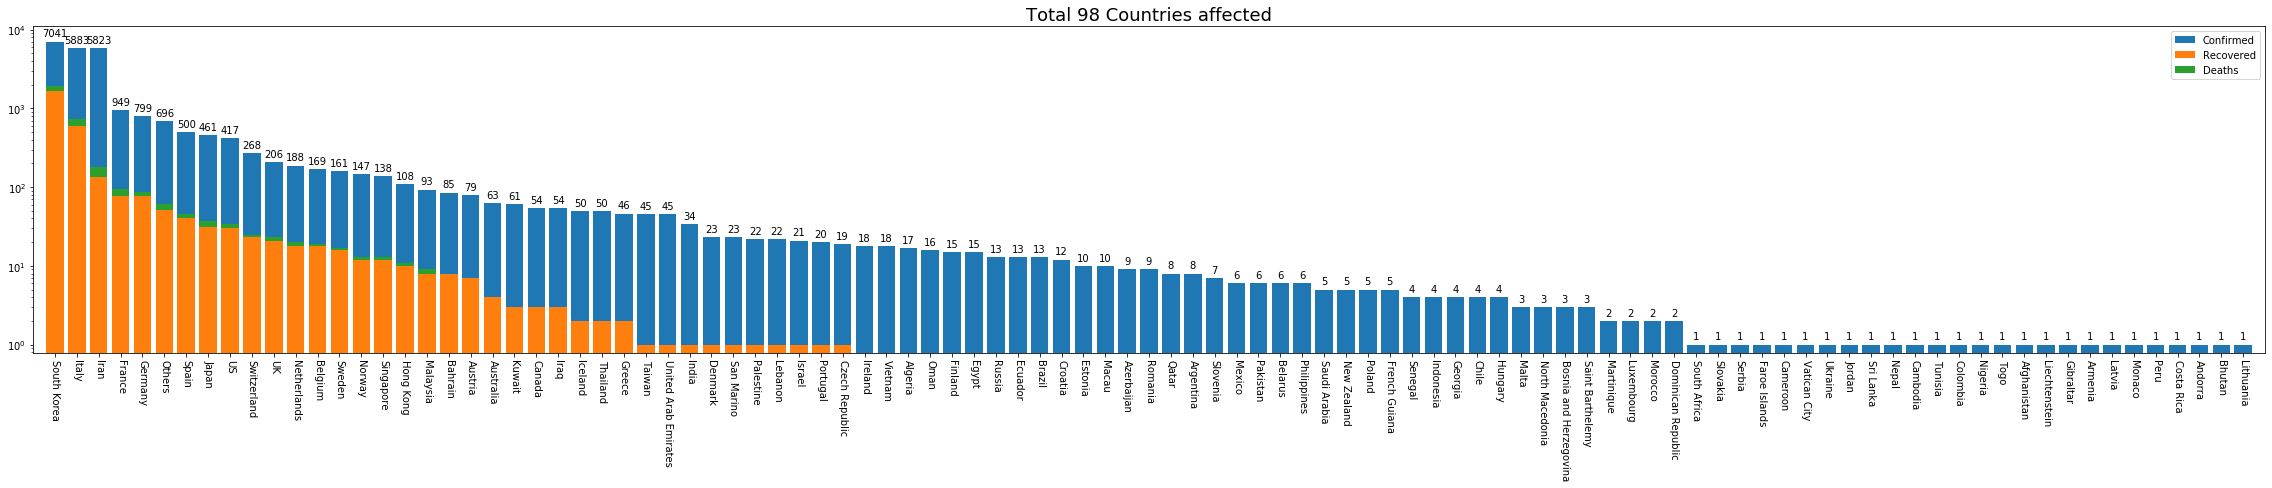

In [122]:
recovered = df_recovered.iloc[1:][time_str[-1]].to_numpy()
deaths = df_deaths.iloc[1:][time_str[-1]].to_numpy()
confirmed = df_confirmed.iloc[1:][time_str[-1]].to_numpy()
x = np.arange(len(confirmed))

fig, ax = plt.subplots(1,1,figsize = (40,6))
rects = ax.bar(x, confirmed)
plt.bar(x, recovered)
plt.bar(x, deaths, bottom = recovered)

plt.legend(['Confirmed', 'Recovered', 'Deaths'])
plt.yscale('log')
plt.ylim(bottom = 10**-0.1)
plt.xlim([-1, len(x)])
a = ax.set_xticks(x)
a = ax.set_xticklabels(list(df_confirmed.index)[1:])
a = plt.xticks(rotation=-90)
a = plt.title(f'Total {len(df_confirmed.index)-4} Countries affected', fontsize = 18)
autolabel(rects, ax, '{:.0f}')

In [46]:
""" Specific Countries """

' Specific Countries '

In [532]:
ctry = 'Others'

In [533]:
x = np.arange(len(time_str))
y = df_confirmed.loc[ctry,time_str].to_list()

ind_t0 = y.index(next(filter(lambda x: x!=0, y)))
t = np.arange(len(time_str))[ind_t0:] - ind_t0
p_t = df_confirmed.loc[ctry,time_str].to_numpy()[ind_t0:]
popt_exp, pcov_exp = opt.curve_fit(exp_growth,  t,  p_t)
popt_log, pcov_log = opt.curve_fit(logistic_growth,  t,  p_t, p0 = (0.1, 100, 1), maxfev=100000)

Text(0.5, 1.0, 'Others: growth rate 0.04/0.38')

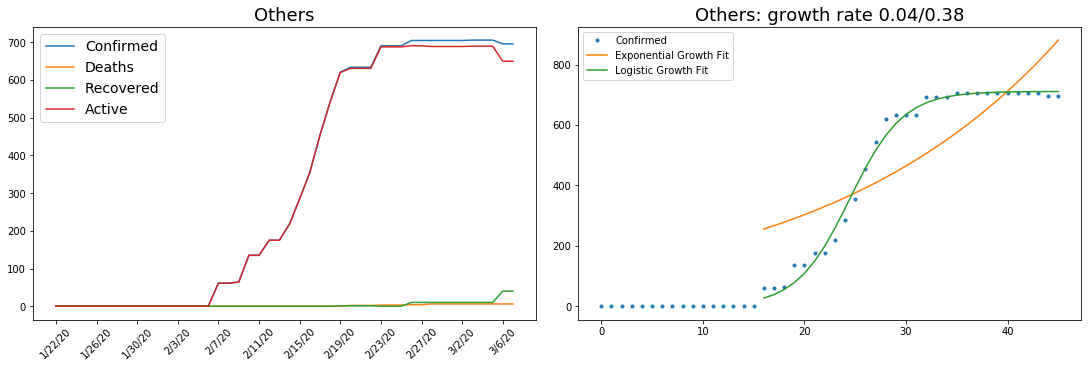

In [534]:
fig = plt.figure(figsize = (15, 5), constrained_layout=True)
gs = fig.add_gridspec(1,2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df_confirmed.loc[ctry, time_str].transpose())
ax1.plot(df_deaths.loc[ctry, time_str].transpose())
ax1.plot(df_recovered.loc[ctry, time_str].transpose())
ax1.plot(df_active.loc[ctry, time_str].transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'], fontsize = 14)
ax1.set_title(ctry, size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x, y, '.')
ax2.plot(t + ind_t0, exp_growth(t, popt_exp[0], popt_exp[1]))
ax2.plot(t + ind_t0, logistic_growth(t, popt_log[0], popt_log[1], popt_log[2]))
ax2.set_yscale('linear')
ax2.legend(['Confirmed', 'Exponential Growth Fit', 'Logistic Growth Fit'])
ax2.set_title(f'{ctry}: growth rate {popt_exp[0]:.2f}/{popt_log[0]:.2f}', fontsize = 18)